#📌 Extracción

In [79]:
import pandas as pd
import numpy as np

datos_telecom = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

df = pd.read_json(datos_telecom)
df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [80]:
#explode code

costumer_norm = pd.json_normalize(df['customer'])#.add_prefix('customer_')
phone_norm = pd.json_normalize(df['phone'])#.add_prefix('phone_')
internet_norm = pd.json_normalize(df['internet'])#.add_prefix('internet_')
account_norm = pd.json_normalize(df['account'])#.add_prefix('account_')

telecom_df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']), costumer_norm, phone_norm, internet_norm, account_norm], axis=1)
df = telecom_df

telecom_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [81]:
#columns
telecom_df.info()
print(telecom_df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformación

In [82]:
#unique values
for col in telecom_df.columns:
    print(f"\nColumn: {col}")
    print(telecom_df[col].unique()[:20])
    print(f"Unique count: {telecom_df[col].nunique()}")


Column: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS'
 '0017-DINOC' '0017-IUDMW' '0018-NYROU' '0019-EFAEP' '0019-GFNTW'
 '0020-INWCK' '0020-JDNXP' '0021-IKXGC' '0022-TCJCI' '0023-HGHWL']
Unique count: 7267

Column: Churn
['No' 'Yes' '']
Unique count: 3

Column: gender
['Female' 'Male']
Unique count: 2

Column: SeniorCitizen
[0 1]
Unique count: 2

Column: Partner
['Yes' 'No']
Unique count: 2

Column: Dependents
['Yes' 'No']
Unique count: 2

Column: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69]
Unique count: 73

Column: PhoneService
['Yes' 'No']
Unique count: 2

Column: MultipleLines
['No' 'Yes' 'No phone service']
Unique count: 3

Column: InternetService
['DSL' 'Fiber optic' 'No']
Unique count: 3

Column: OnlineSecurity
['No' 'Yes' 'No internet service']
Unique count: 3

Column: OnlineBackup
['Yes' 'No' 'No internet service']
Unique count: 3

Column: DeviceProtection


In [83]:
telecom_df = telecom_df.rename(columns={'customerID': 'CustomerID'})
telecom_df = telecom_df.rename(columns={'Churn': 'CustomerChurn'})
telecom_df = telecom_df.rename(columns={'gender': 'Gender'})
telecom_df = telecom_df.rename(columns={'tenure': 'Tenure'})
telecom_df = telecom_df.rename(columns={'Charges.Monthly': 'ChargesMonthly'})
telecom_df = telecom_df.rename(columns={'Charges.Total': 'ChargesTotal'})

#telecom_df = telecom_df.fillna(0)

print(telecom_df)
print(telecom_df.columns.tolist())
#print(telecom_df.info())

      CustomerID CustomerChurn  Gender  SeniorCitizen Partner Dependents  \
0     0002-ORFBO            No  Female              0     Yes        Yes   
1     0003-MKNFE            No    Male              0      No         No   
2     0004-TLHLJ           Yes    Male              0      No         No   
3     0011-IGKFF           Yes    Male              1     Yes         No   
4     0013-EXCHZ           Yes  Female              1     Yes         No   
...          ...           ...     ...            ...     ...        ...   
7262  9987-LUTYD            No  Female              0      No         No   
7263  9992-RRAMN           Yes    Male              0     Yes         No   
7264  9992-UJOEL            No    Male              0      No         No   
7265  9993-LHIEB            No    Male              0     Yes        Yes   
7266  9995-HOTOH            No    Male              0     Yes        Yes   

      Tenure PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0     

In [84]:
#search for empty strings
empty_counts = (telecom_df == '').sum()
print("Empty string counts per column:")
print(empty_counts[empty_counts > 0])

#replace empty ones with 0
telecom_df = telecom_df.replace('', -1)

#standarization
cols_replace = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_replace:
    telecom_df[col] = telecom_df[col].replace(
        {'No internet service': 'No', 'No phone service': 'No'}
    )

#clean object columns
obj_cols = telecom_df.select_dtypes(include="object").columns
telecom_df[obj_cols] = telecom_df[obj_cols].apply(lambda s: s.str.strip())

print(telecom_df.info())


Empty string counts per column:
CustomerChurn    224
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7267 non-null   object 
 1   CustomerChurn     7043 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 

In [85]:
#standarize to lowercase/strip all objects
obj_cols = telecom_df.select_dtypes(include="object").columns
telecom_df[obj_cols] = telecom_df[obj_cols].apply(lambda s: s.str.strip().str.lower())


#standarize object
cols_to_standardize = ["Contract", "InternetService", "CustomerID", "PaymentMethod"]

for col in cols_to_standardize:
    if col in telecom_df.columns:
        s = telecom_df[col].astype("string")

        # Special cleanup for PaymentMethod: remove '(automatic)'
        if col == "PaymentMethod":
            s = s.str.replace(r"\(automatic\)", "", regex=True)

        telecom_df[col] = (
            s
            .str.replace("-", ".", regex=False)
            .str.replace(" ", ".", regex=False)
            .str.replace(r"\.+", ".", regex=True)
            .str.strip(".")
        )

#ChargesTotal to float64
if "ChargesTotal" in telecom_df.columns:
    telecom_df["ChargesTotal"] = (
        telecom_df["ChargesTotal"]
            .astype(str)
            .str.replace(r"[^\d.\-]", "", regex=True)
            .replace({"": np.nan})
            .pipe(pd.to_numeric, errors="coerce")
            .astype("float64")
    )

print(telecom_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7267 non-null   string 
 1   CustomerChurn     7043 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   string 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   string 


In [86]:
#daily cost
telecom_df['ChargesDaily'] = (telecom_df['ChargesMonthly'] / 30).round(2)
print(telecom_df[['ChargesMonthly', 'ChargesDaily']].head())
print(telecom_df.info())

   ChargesMonthly  ChargesDaily
0            65.6          2.19
1            59.9          2.00
2            73.9          2.46
3            98.0          3.27
4            83.9          2.80
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7267 non-null   string 
 1   CustomerChurn     7043 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   string 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   obje

In [87]:
# #yes/no values
yes_no_cols = [
    "CustomerChurn", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]
yes_no_cols = [c for c in yes_no_cols if c in telecom_df.columns]

#maping
def map_yes_no_to_int(s):
    if np.issubdtype(s.dtype, np.number):
        return s.fillna(-1).astype("int8")

    mapped = s.map({"yes": 1, "no": 0, "-1": -1, "1": 1, "0": 0})
    # Default any remaining NaN/unknowns to -1
    return pd.to_numeric(mapped, errors="coerce").fillna(-1).astype("int8")

#apply to all yes/no
telecom_df[yes_no_cols] = telecom_df[yes_no_cols].apply(map_yes_no_to_int)

for col in yes_no_cols:
    uniques = telecom_df[col].unique()
    print(f"{col}: {uniques} (dtype={telecom_df[col].dtype})")

CustomerChurn: [ 0  1 -1] (dtype=int8)
Partner: [1 0] (dtype=int8)
Dependents: [1 0] (dtype=int8)
PhoneService: [1 0] (dtype=int8)
MultipleLines: [0 1] (dtype=int8)
OnlineSecurity: [0 1] (dtype=int8)
OnlineBackup: [1 0] (dtype=int8)
DeviceProtection: [0 1] (dtype=int8)
TechSupport: [1 0] (dtype=int8)
StreamingTV: [1 0] (dtype=int8)
StreamingMovies: [0 1] (dtype=int8)
PaperlessBilling: [1 0] (dtype=int8)


In [88]:
#check values
for col in telecom_df.columns:
    print(f"\nColumn: {col}")
    print(telecom_df[col].unique()[:5])
    print(f"Unique count: {telecom_df[col].nunique()}")


Column: CustomerID
<StringArray>
['0002.orfbo', '0003.mknfe', '0004.tlhlj', '0011.igkff', '0013.exchz']
Length: 5, dtype: string
Unique count: 7267

Column: CustomerChurn
[ 0  1 -1]
Unique count: 3

Column: Gender
['female' 'male']
Unique count: 2

Column: SeniorCitizen
[0 1]
Unique count: 2

Column: Partner
[1 0]
Unique count: 2

Column: Dependents
[1 0]
Unique count: 2

Column: Tenure
[ 9  4 13  3 71]
Unique count: 73

Column: PhoneService
[1 0]
Unique count: 2

Column: MultipleLines
[0 1]
Unique count: 2

Column: InternetService
<StringArray>
['dsl', 'fiber.optic', 'no']
Length: 3, dtype: string
Unique count: 3

Column: OnlineSecurity
[0 1]
Unique count: 2

Column: OnlineBackup
[1 0]
Unique count: 2

Column: DeviceProtection
[0 1]
Unique count: 2

Column: TechSupport
[1 0]
Unique count: 2

Column: StreamingTV
[1 0]
Unique count: 2

Column: StreamingMovies
[0 1]
Unique count: 2

Column: Contract
<StringArray>
['one.year', 'month.to.month', 'two.year']
Length: 3, dtype: string
Unique

#📊 Carga y análisis

In [89]:
print("\n===== Dataset shape =====")
print(telecom_df.shape)

#numerics
numeric_cols = telecom_df.select_dtypes(include=[np.number]).columns.tolist()

print("\n===== Descriptive Statistics: Numerical Features =====")
if numeric_cols:
    numeric_summary = telecom_df[numeric_cols].describe().T
    numeric_summary["missing"] = telecom_df[numeric_cols].isna().sum().values
    print(numeric_summary)
else:
    print("(no numeric columns found)")
    numeric_summary = pd.DataFrame()

#categorical/string
categorical_cols = telecom_df.select_dtypes(
    include=["string", "object", "category", "boolean"]
).columns.tolist()

print("\n===== Descriptive Statistics: Categorical / String Features =====")
if categorical_cols:
    categorical_summary = telecom_df[categorical_cols].describe().T
    categorical_summary["missing"] = telecom_df[categorical_cols].isna().sum().values
    print(categorical_summary)
else:
    print("(no categorical/string columns found)")
    categorical_summary = pd.DataFrame()

#median & variance
print("\n===== Extra Stats: Median & Variance (Numerical Features) =====")
if numeric_cols:
    extra_stats = telecom_df[numeric_cols].agg(["median", "var"]).T
    print(extra_stats)
else:
    print("(no numeric columns for extra stats)")

#churn distribution
print("\n===== Churn Distribution =====")
if "CustomerChurn" in telecom_df.columns:
    churn_counts = telecom_df["CustomerChurn"].value_counts(dropna=False)
    churn_perc   = telecom_df["CustomerChurn"].value_counts(normalize=True, dropna=False) * 100
    churn_summary = pd.DataFrame({"count": churn_counts, "percent": churn_perc.round(2)})
    print(churn_summary)
else:
    print("Column 'CustomerChurn' not found")

# ---- Optional: quick peek at a few key categoricals ----
peek_cols = [c for c in ["Contract", "InternetService", "PaymentMethod", "Gender"] if c in telecom_df.columns]
if peek_cols:
    print("\n===== Sample value counts (top 5) for key categoricals =====")
    for c in peek_cols:
        print(f"\n{c}:")
        print(telecom_df[c].value_counts().head(5))


===== Dataset shape =====
(7267, 22)

===== Descriptive Statistics: Numerical Features =====
                   count         mean          std    min      25%      50%  \
CustomerChurn     7267.0     0.226366     0.486627  -1.00    0.000     0.00   
SeniorCitizen     7267.0     0.162653     0.369074   0.00    0.000     0.00   
Partner           7267.0     0.484106     0.499782   0.00    0.000     0.00   
Dependents        7267.0     0.300124     0.458343   0.00    0.000     0.00   
Tenure            7267.0    32.346498    24.571773   0.00    9.000    29.00   
PhoneService      7267.0     0.902711     0.296371   0.00    1.000     1.00   
MultipleLines     7267.0     0.421770     0.493876   0.00    0.000     0.00   
OnlineSecurity    7267.0     0.285950     0.451897   0.00    0.000     0.00   
OnlineBackup      7267.0     0.344571     0.475261   0.00    0.000     0.00   
DeviceProtection  7267.0     0.342782     0.474672   0.00    0.000     0.00   
TechSupport       7267.0     0.289528

In [90]:
print(telecom_df.columns.tolist())

['CustomerID', 'CustomerChurn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'ChargesMonthly', 'ChargesTotal', 'ChargesDaily']


In [91]:
# Distribution of churn values
churn_counts = telecom_df['CustomerChurn'].value_counts().reset_index()
churn_counts.columns = ['CustomerChurn', 'Count']

# Add percentage column
churn_counts['Percentage'] = ((churn_counts['Count'] / churn_counts['Count'].sum()) * 100).round(0)

print("\n===== Customer Churn Distribution DataFrame =====")
print(churn_counts)


===== Customer Churn Distribution DataFrame =====
   CustomerChurn  Count  Percentage
0              0   5174        71.0
1              1   1869        26.0
2             -1    224         3.0


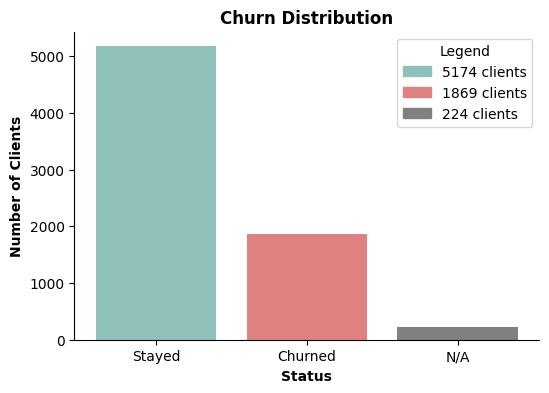

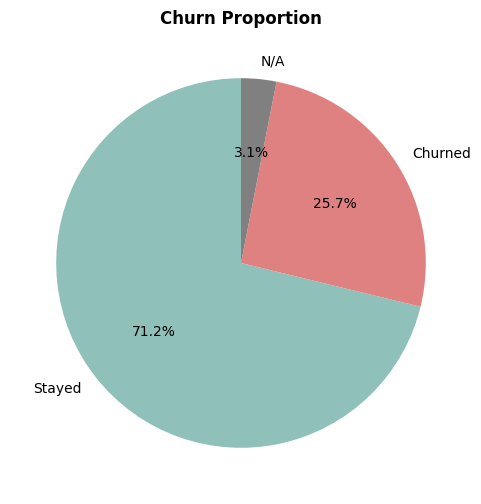

In [92]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Map churn values for clarity
label_map = {0: "Stayed", 1: "Churned", -1: "N/A"}
churn_counts["ChurnLabel"] = churn_counts["CustomerChurn"].map(label_map)

# --- Bar chart ---
plt.figure(figsize=(6,4))
ax = plt.gca()

colors = ['#8fc0b9','#e08181','gray']
bars = plt.bar(churn_counts['ChurnLabel'], churn_counts['Count'], color=colors)

plt.title("Churn Distribution", fontweight='bold')
plt.xlabel("Status", fontweight='bold')
plt.ylabel("Number of Clients", fontweight='bold')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create legend handles with counts
handles = [
    mpatches.Patch(color=color, label=f"{count} clients")
    for color, count in zip(colors, churn_counts['Count'])
]

plt.legend(handles=handles, title="Legend", loc="upper right")

plt.show()

# --- Pie chart ---
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts['Count'],
    labels=churn_counts['ChurnLabel'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)

plt.title("Churn Proportion", fontweight='bold')
plt.show()


===== Churn by Gender =====
   Gender CustomerChurn  Count  Percentage
0  female            -1    104        2.90
1  female             0   2549       70.96
2  female             1    939       26.14
3    male            -1    120        3.27
4    male             0   2625       71.43
5    male             1    930       25.31

===== Churn by InternetService =====
  InternetService CustomerChurn  Count  Percentage
0             dsl            -1     67        2.69
1             dsl             0   1962       78.86
2             dsl             1    459       18.45
3     fiber.optic            -1    102        3.19
4     fiber.optic             0   1799       56.25
5     fiber.optic             1   1297       40.56
6              no            -1     55        3.48
7              no             0   1413       89.37
8              no             1    113        7.15

===== Churn by Contract =====
         Contract CustomerChurn  Count  Percentage
0  month.to.month            -1    130  

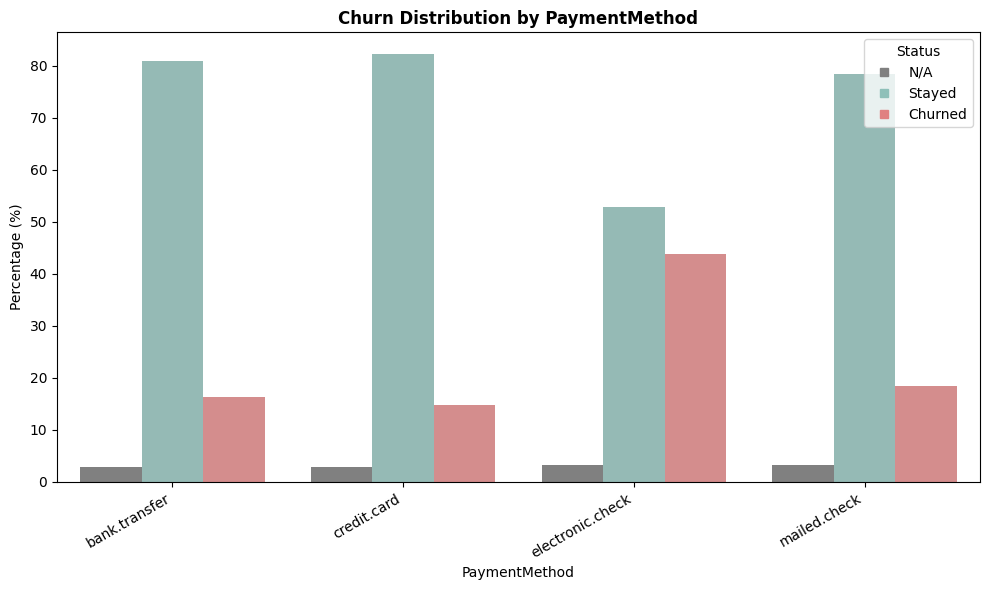

In [93]:
import seaborn as sns

#churn distribution by categorical variable
def churn_by_category(df, column, churn_col="CustomerChurn"):
    stats = (
        df.groupby([column, churn_col], dropna=False)
          .size()
          .reset_index(name="Count")
    )
    #percentagen
    totals = stats.groupby(column)["Count"].transform("sum")
    stats["Percentage"] = (stats["Count"] / totals * 100).round(2)

    #order churn codes
    if pd.api.types.is_numeric_dtype(df[churn_col]):
        order = [-1, 0, 1]
        stats[churn_col] = pd.Categorical(stats[churn_col], categories=order, ordered=True)
        stats = stats.sort_values([column, churn_col])

    return stats

#categorical columns
categorical_cols = telecom_df.select_dtypes(include=["object", "string", "category"]).columns.tolist()
categorical_cols = [c for c in categorical_cols if c.lower() != "customerid"]

for col in categorical_cols:
    print(f"\n===== Churn by {col} =====")
    stats = churn_by_category(telecom_df, col)
    print(stats)

#plot
plt.figure(figsize=(10,6))
sns.barplot(
        data=stats,
        x=col, y="Percentage", hue="CustomerChurn",
        palette={-1:"gray", 0:"#8fc0b9", 1:"#e08181"}
    )

plt.title(f"Churn Distribution by {col}", fontweight="bold")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30, ha="right")
palette = {-1:"gray", 0:"#8fc0b9", 1:"#e08181"}
handles = [
    plt.Line2D([0],[0], marker="s", color=color, linestyle="")
    for code, color in palette.items()
]
labels = ["N/A", "Stayed", "Churned"]

plt.legend(handles, labels, title="Status", loc="upper right")

plt.tight_layout()
plt.show()

In [94]:
#churn by numeric variable
def churn_by_numeric(df, column, churn_col="CustomerChurn", bins=5):
    #equal-width bins
    binned = pd.cut(df[column], bins=bins, include_lowest=True)

    #counts
    stats = (
        df.groupby([binned, churn_col], dropna=False, observed=True)  # 👈 explicit
          .size()
          .reset_index(name="Count")
    )

    #% within each bin
    totals = stats.groupby(column, observed=True)["Count"].transform("sum")  # 👈 explicit
    stats["Percentage"] = (stats["Count"] / totals * 100).round(2)

    #order churn codes if numeric
    if pd.api.types.is_numeric_dtype(df[churn_col]):
        order = [-1, 0, 1]
        stats[churn_col] = pd.Categorical(stats[churn_col], categories=order, ordered=True)
        stats = stats.sort_values([column, churn_col])

    return stats

#numeric columns
numeric_cols = telecom_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c.lower() != "customerchurn"]  # exclude churn itself

for col in numeric_cols:
    print(f"\n===== Churn by {col} (binned) =====")
    stats = churn_by_numeric(telecom_df, col, bins=5)
    print(stats)

    pivot = stats.pivot(index=col, columns="CustomerChurn", values="Percentage").fillna(0)
    print("\n-- Percentage Pivot --")
    print(pivot.round(1))


===== Churn by SeniorCitizen (binned) =====
   SeniorCitizen CustomerChurn  Count  Percentage
0  (-0.002, 0.2]            -1    184        3.02
1  (-0.002, 0.2]             0   4508       74.08
2  (-0.002, 0.2]             1   1393       22.89
3     (0.8, 1.0]            -1     40        3.38
4     (0.8, 1.0]             0    666       56.35
5     (0.8, 1.0]             1    476       40.27

-- Percentage Pivot --
CustomerChurn   -1     0     1
SeniorCitizen                 
(-0.002, 0.2]  3.0  74.1  22.9
(0.8, 1.0]     3.4  56.4  40.3

===== Churn by Partner (binned) =====
         Partner CustomerChurn  Count  Percentage
0  (-0.002, 0.2]            -1    108        2.88
1  (-0.002, 0.2]             0   2441       65.11
2  (-0.002, 0.2]             1   1200       32.01
3     (0.8, 1.0]            -1    116        3.30
4     (0.8, 1.0]             0   2733       77.69
5     (0.8, 1.0]             1    669       19.02

-- Percentage Pivot --
CustomerChurn   -1     0     1
Partner      

#📄Informe final

# 📑Análisis de Evasión de Clientes (TelecomeX)

## 🔹 Introducción
Como desafío se nos presentó analizar y comprender los factores que influyen en la **evasión de clientes (Churn)** en una compañía de telecomunicaciones. El churn representa la pérdida de clientes en un período determinado y afecta directamente los ingresos y la sostenibilidad del negocio. Este estudio busca identificar patrones de comportamiento que expliquen por qué los clientes abandonan el servicio y qué características se asocian con una mayor probabilidad de retención.

---

## 🔹 Limpieza y Tratamiento de Datos
Se aplicó un proceso sistemático de preparación:

1. **Normalización de texto**  
   - Conversión a minúsculas y **strip** de espacios.  
   - Reemplazo de espacios y guiones por puntos en columnas clave (p. ej., `Contract`, `InternetService`, `PaymentMethod`, `CustomerID`).  
   - Eliminación de “(automatic)” en `PaymentMethod`.

2. **Variables binarias (Sí/No)**  
   - Mapeo uniforme a valores numéricos: `yes → 1`, `no → 0`, y uso de `-1` como indicador de ausencia/indeterminado cuando aplica.

3. **Tratamiento de costos**  
   - Conversión de `ChargesTotal` a `float64` (limpieza de símbolos, coerción segura).  
   - Creación de **ChargesDaily**.

4. **Estandarización de categorías de servicio**  
   - Homologación de “No internet service” / “No phone service” a “No”.  

---

## 🔹 Análisis Exploratorio de Datos (EDA)
Se elaboraron **estadísticas descriptivas**, tablas y gráficos para entender la distribución del churn por variable.

### Categóricas
- **Contract**:  
  - `month.to.month` exhibe la **mayor tasa de churn**.  
  - `one.year` < `two.year` con **menor churn** (mayor compromiso → mayor retención).
- **PaymentMethod**:  
  - `electronic.check` asocia **mayor churn**.  
  - `bank.transfer` / `credit.card` (automatizados) muestran **menor churn**.
- **Servicios adicionales** (`OnlineSecurity`, `OnlineBackup`, `TechSupport`, `StreamingTV/Movies`):  
  - La suscripción a add-ons **reduce** la probabilidad de churn (mayor adopción → mayor stickiness).

### Numéricas (binned)
- **Tenure**: Clientes con **< 12 meses** presentan la mayor tasa de churn; la tasa **disminuye** conforme crece la antigüedad (efecto lealtad).  
- **ChargesMonthly**: Curva en **U**: churn alto en **muy bajos** y **muy altos** gastos; zona media más estable.  
- **ChargesTotal**: A mayor valor acumulado, **menor churn** (correlato de permanencia).

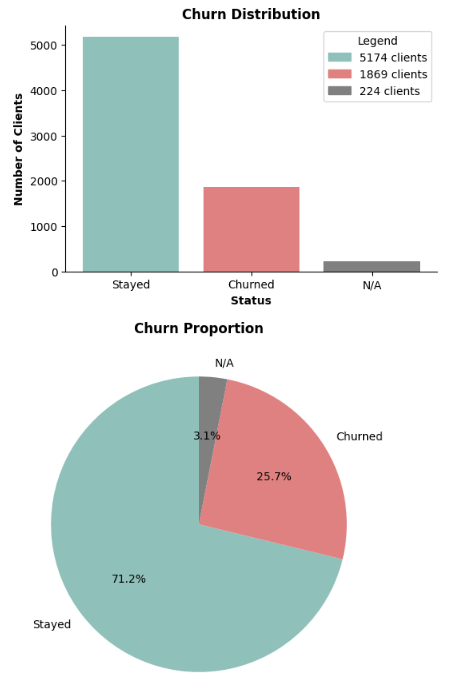

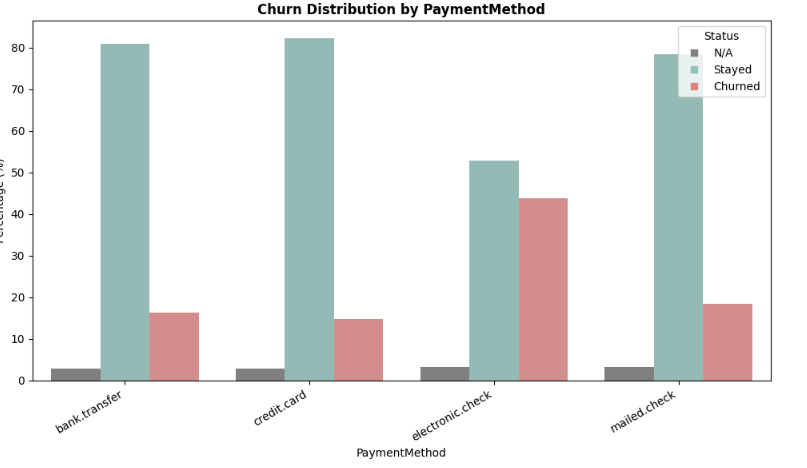

---

## 🔹 Conclusiones e Insights
1. **Riesgo temprano**: el **primer año** concentra el mayor churn.  
2. **Automatización de pagos**: se asocia con **mayor estabilidad** (menor churn).  
3. **Bundling** de servicios adicionales **reduce** la probabilidad de abandono.  
4. **Contratos más largos** (1–2 años) disminuyen significativamente el churn.  
5. **Sensibilidad al precio**: clientes de gasto muy bajo (poca vinculación) y muy alto (posible insatisfacción) tienden a desertar más.

---

## 🔹 Recomendaciones
1. **Retención temprana**: onboarding proactivo, soporte y “check-ins” en los **primeros 3–12 meses**.  
2. **Migración de contrato**: incentivos para pasar de `month.to.month` a **1–2 años**.  
3. **Fomentar auto‑pago**: descuentos/beneficios por **bank transfer** o **credit card**.  
4. **Paquetes de valor**: promover **add-ons** (seguridad, backup, soporte, streaming) para aumentar fidelización.  
5. **Gestión por segmento de gasto**:  
   - **Bajo gasto** → campañas de engagement/upselling.  
   - **Alto gasto** → beneficios de lealtad, revisión de plan y atención prioritaria.

---

> 🧩 Este informe resume el pipeline de datos, EDA y hallazgos clave para **anticipar el riesgo de churn** y orientar **acciones de retención** que maximicen el CLV (Customer Lifetime Value).
"""
